In [1]:
%matplotlib inline

In [87]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.xarray
import xrscipy

sns.set(style='ticks', context='paper', palette='colorblind',font_scale=1.3)
mpl.rc('figure', dpi=100, figsize=[11, 5])
mpl.rc('savefig', dpi=500, bbox='tight')
mpl.rc('legend', frameon=False)


from deformtools.tools import alphabet
import warnings

warnings.simplefilter('ignore')

In [78]:
dat = xr.open_mfdataset('../data/clusters/combinations_lt_10_*.nc',concat_dim='clusters',autoclose=True)

In [174]:
dat['vort'] = dat.vort*gsw.f(40)
dat['div'] = dat.div*gsw.f(40)

In [175]:
dat
dat['itime'] = ('time', np.arange(0,len(dat.time)))

In [176]:
dat = dat.assign_coords(time=dat.itime)

In [177]:
dat.vort.mean(dim='clusters').dropna('time')

<xarray.DataArray 'vort' (time: 252)>
dask.array<shape=(252,), dtype=float64, chunksize=(252,)>
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 244 245 246 247 248 249 250 251

In [191]:
fftvort = xrscipy.fftpack.fft(dat.vort.mean(dim='clusters').dropna('time').load()**2,'time')
fftdiv = xrscipy.fftpack.fft(dat.div.mean(dim='clusters').dropna('time').load()**2,'time')
fftstrain = xrscipy.fftpack.fft(dat.strain.mean(dim='clusters').dropna('time').load()**2,'time')

In [192]:
n = len(dat.div.mean(dim='clusters').dropna('time').load())

In [193]:
from scipy.fftpack import fftshift

In [194]:
fftvort = fftshift(fftvort)
time = fftfreq(n,d=1)

(0.1, 0.6)

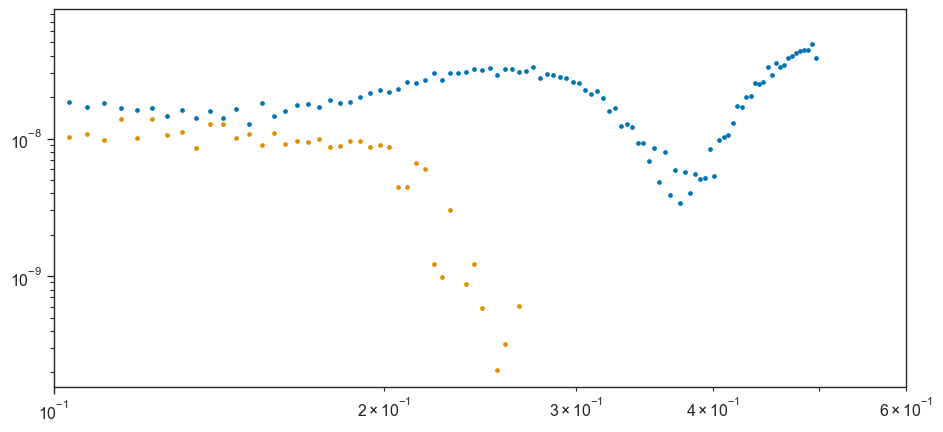

In [196]:
plt.plot(time,np.real(fftvort),marker='.',lw=0)
plt.plot(time,np.real(fftdiv),marker='.',lw=0)
# plt.plot(fftstrain.time,fftstrain,marker='.',lw=0)
plt.xscale('log')
plt.yscale('log')
# plt.ylim(1e-8,1e1)
plt.xlim(1e-1,6e-1)

In [166]:
import gsw
2*np.pi/gsw.f(40)/3600

18.617714497399174

In [1]:
import xrscipy.signal as dsp
def compute_spectra(raw,array):
    raw['dtime'] = ('time', np.array( (raw.time - raw.time.isel(time=0)).values*1e-9, dtype=float))
    raw = raw.swap_dims({'time':'dtime'})
    return dsp.spectrogram(raw[array].dropna(dim='dtime'), dim='dtime', fs=86400/dsp.get_sampling_step(raw, dim='dtime'), nperseg=128 )

In [ ]:
spec = compute_spectra(dat, 'strain').squeeze()

In [ ]:
spec.pipe(np.log10).plot(vmin=-4, vmax=-1.5)
plt.xscale('log')
plt.xlim(1e-1,2e1)

In [2]:
import gsw
latmean = dat.lat.mean()
1.7*gsw.f(17.4)*86400/(2*np.pi)

NameError: name 'dat' is not defined

In [ ]:
spec.mean(dim='clusters').plot()
# plt.axvline(1.3*gsw.f(latmean)*86400/(2*np.pi), lw=2, color='r')
plt.axvline(gsw.f(latmean)*86400/(2*np.pi), lw=2, color='r')
plt.xscale('log')
plt.yscale('log')